In [1]:
FROM_CACHE = True
GPT2_VERSION = 'distilgpt2'
DEVICE = 'cpu'

In [2]:
import winobias
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions
from transformers import GPT2Tokenizer
import json

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


## Dev Set Results Distilgpt2 (filtering on odds ratio): 

In [3]:
fname = f'winobias_data/attention_intervention_results_{GPT2_VERSION}_filtered.json'
if not FROM_CACHE:
	quantile = 0.25
	model = Model(output_attentions=True, gpt2_version=GPT2_VERSION, device=DEVICE)
	tokenizer = GPT2Tokenizer.from_pretrained(GPT2_VERSION)
	examples = winobias.load_dev_examples()
	
	df = winobias.analyze(examples, gpt2_version=GPT2_VERSION)
	df_expected = df[df.odds_ratio > 1]
	threshold = df_expected.odds_ratio.quantile(quantile)
	
	filtered_examples = []
	assert len(examples) == len(df)
	for i in range(len(examples)):
		ex = examples[i]
		odds_ratio = df.iloc[i].odds_ratio
		if odds_ratio > threshold:
	
			filtered_examples.append(ex)
	print(f'Num examples with odds ratio > 1: {len(df_expected)} / {len(examples)}')
	
	print(f'Num examples with odds ratio > {threshold:.4f} ({quantile} quantile): {len(filtered_examples)} / {len(examples)}')
			 
	examples = filtered_examples
	
	interventions = [ex.to_intervention(tokenizer) for ex in examples]
	results = perform_interventions(interventions, model)
	with open(fname, 'w') as f:
		json.dump(results, f)
with open(fname) as f:
	results = json.load(f)

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 61
Mean total effect: 0.12

INDIRECT Effect (mean = 0.0005050716648959721)
Top 10 heads:
   3 1: 0.024 (p=0.0000)
   2 6: 0.005 (p=0.0000)
   3 6: 0.003 (p=0.0015)
   2 3: 0.003 (p=0.0036)
   4 2: 0.002 (p=0.0268)
   4 0: 0.001 (p=0.1740)
   3 10: 0.001 (p=0.3590)
   0 8: 0.001 (p=0.4278)
   2 8: 0.001 (p=0.4458)
   3 8: 0.001 (p=0.4544)

DIRECT Effect (mean = 0.11791232544827006)
Top 10 heads:
   3 1: 0.094 (p=0.0227)
   3 6: 0.114 (p=0.3639)
   2 6: 0.114 (p=0.3882)
   4 2: 0.116 (p=0.4275)
   2 3: 0.116 (p=0.4478)
   4 0: 0.117 (p=0.4779)
   3 10: 0.118 (p=0.4908)
   2 9: 0.118 (p=0.4936)
   3 8: 0.118 (p=0.4981)
   1 1: 0.118 (p=0.4991)


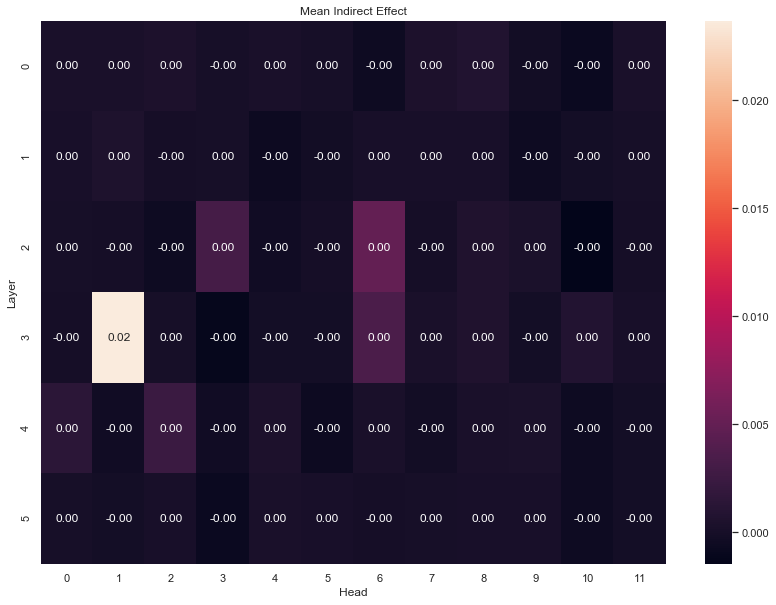

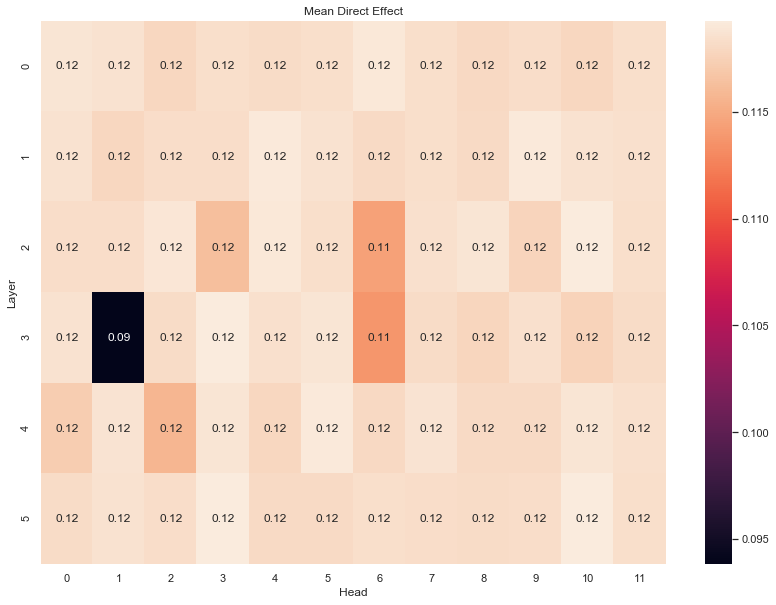

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 61
Mean total effect: 0.12


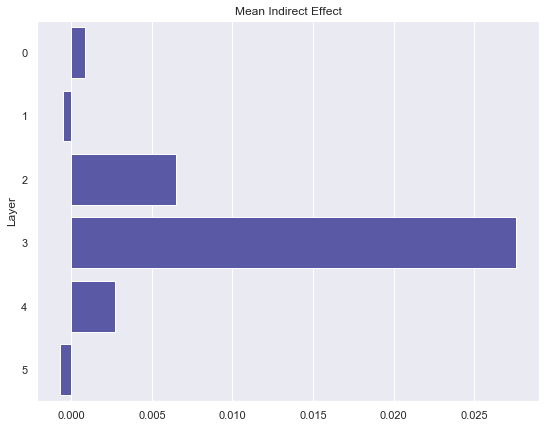

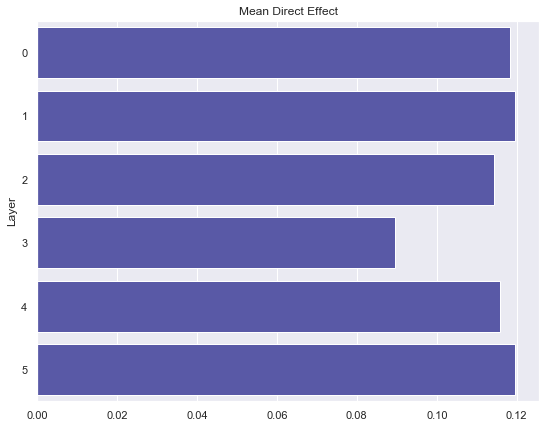

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.30771
p(c2|x') / p(c1|x') = 0.34087

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.108


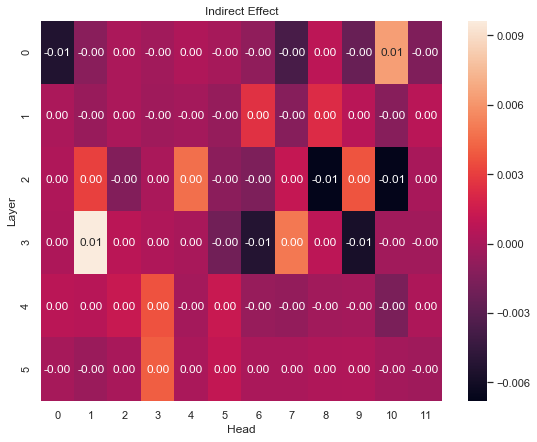

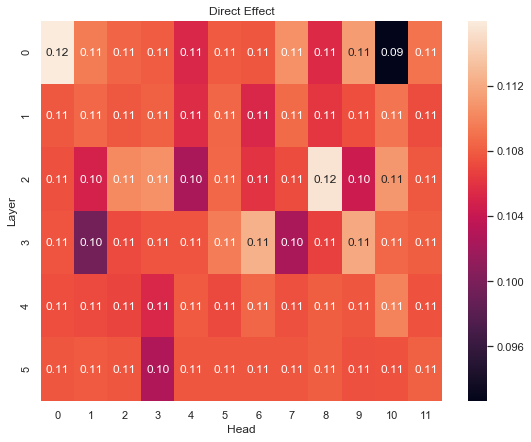

In [6]:
report_intervention(results[0])

x : The farmer offered apples to the housekeeper, because she
x': The farmer offered apples to the housekeeper, because he
c1: might like them .
c2: had too many of them .

p(c2|x) / p(c1|x) = 4.14585
p(c2|x') / p(c1|x') = 4.34358

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.048


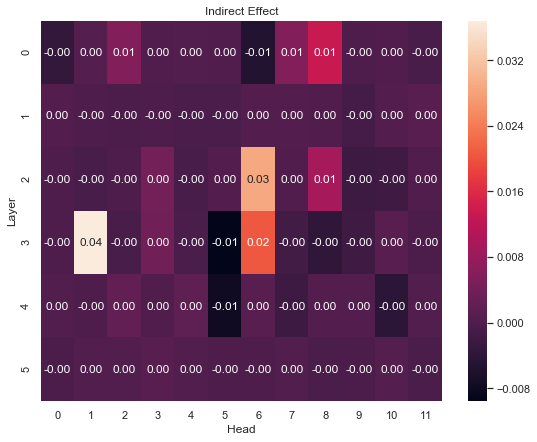

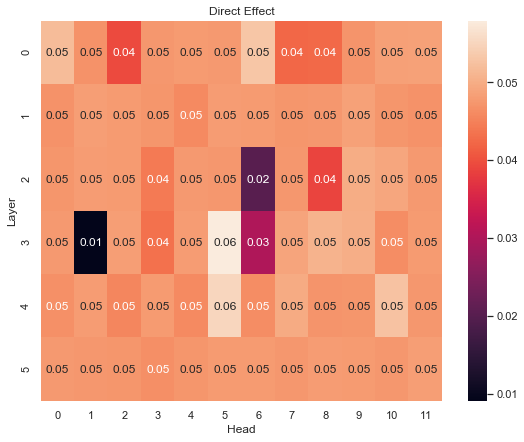

In [7]:
report_intervention(results[1])

x : The CEO helped the nurse because she
x': The CEO helped the nurse because he
c1: needed help .
c2: wanted to help .

p(c2|x) / p(c1|x) = 1.30692
p(c2|x') / p(c1|x') = 1.84857

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.414


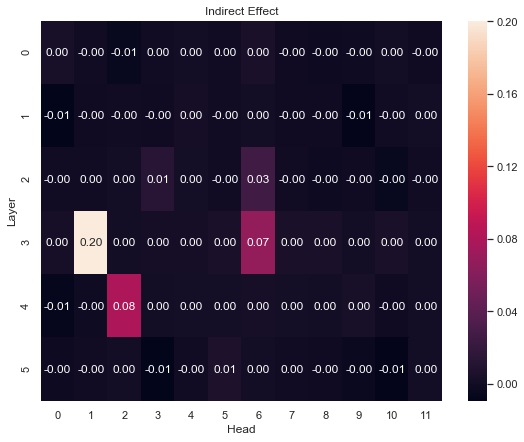

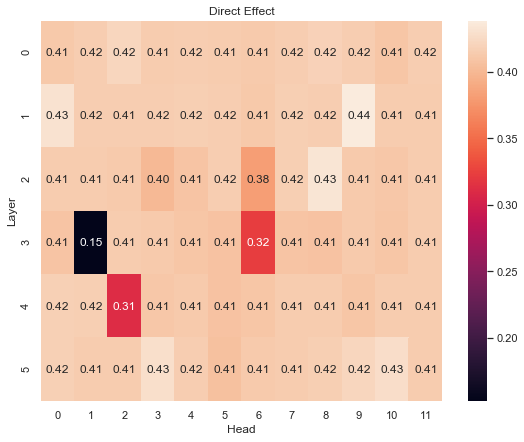

In [8]:
report_intervention(results[2])

x : The auditor caught the developer cheating because she
x': The auditor caught the developer cheating because he
c1: discovered the key documents .
c2: is dishonest .

p(c2|x) / p(c1|x) = 1.48371
p(c2|x') / p(c1|x') = 1.58108

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.066


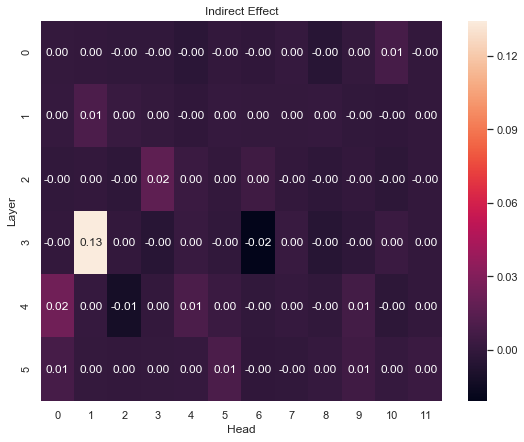

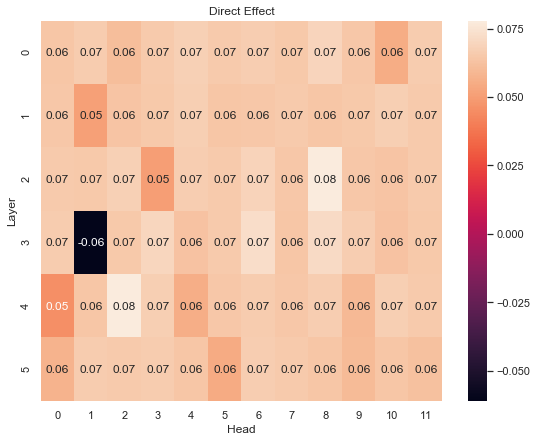

In [9]:
report_intervention(results[3])
